# 파이썬 책 데이터 분석 과제

## 1. 데이터 불러오기

In [1]:
import urllib
import json
import datetime
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
client_id = "iM4TlJIZ34CioKhpxK0p"
client_secret = "AASucekLJ0"

In [3]:
# 네이버 API 상세검색에서 연도를 지정해줄 범위와 키워드 설정
years_start = [19600101, 20050101, 20100101, 20160101, 20200101]
years_end = [20041231, 20091231, 20151231, 20191231, 20220426]

keywords = ['Python', '파이썬', 'C', 'C 언어', 'Java', '자바', 'C++', 'C#', 'Visual Basic', '비주얼 베이직', 'JavaScript', '자바스크립트', 'SQL', 'PHP', 'R', 'R 언어']

In [4]:
# url 설정: 상세검색으로 타이틀과 연도를 지정해준다.
def get_url(search_text, start_num, disp_num, years_start, years_end):
    base = "https://openapi.naver.com/v1/search/book_adv.json"
    param_query = "?d_titl=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    param_start = "&d_dafr=" + str(years_start)
    param_end = "&d_dato=" + str(years_end)
    param_cat = "&d_catg=280"

    return base + param_query + param_start + param_disp + param_start + param_end + param_cat

In [5]:
# 검색 결과 저장
def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now())
    return json.loads(response.read().decode("utf-8"))

In [6]:
# 타이틀에 포함되는 tag를 삭제
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str

In [7]:
# 책에대한 정보를 긁어오는 함수. 제목, 저자, 가격, 출판사, isbn, 출판연도, 그리고 상세검색어를 데이터프레임에 넣어준다
def get_info(contents, keyword):
    tmp_lst = []
    for book in contents['items']:
        title = delete_tag(book['title'])
        author = book['author']
        price = book['price']
        publisher = book['publisher']
        pubdate = book['pubdate']
        link = book['link']

        try:
            isbn = book['isbn'].split()[0]
        except:
            continue

        tmp_lst.append({
                "title":title,
                "author":author,
                "price":price,
                "publisher":publisher,
                "isbn":isbn,
                "pubdate":pubdate,
                "keyword":keyword,
                "link":link
            })
        

    tmp_df = pd.DataFrame(tmp_lst)
    return tmp_df

In [8]:
book_df = pd.DataFrame()

In [9]:
# 반복문을 돌려 각 검색어의 책 정보를 불러모아 book_df에 저장
for query in keywords:
    for i in range(5):
        start = years_start[i]
        end = years_end[i]
        for n in range(1, 1000, 100):
            url = get_url(query, n, 100, start, end)
            one_result = get_result_onpage(url)
            tmp_df = get_info(one_result, query)

        book_df = pd.concat([book_df, tmp_df], ignore_index=True)
        time.sleep(1)

[2022-04-27 13:13:03.779824] Url Request Success
[2022-04-27 13:13:03.853672] Url Request Success
[2022-04-27 13:13:03.959942] Url Request Success
[2022-04-27 13:13:04.053839] Url Request Success
[2022-04-27 13:13:04.130268] Url Request Success
[2022-04-27 13:13:04.187516] Url Request Success
[2022-04-27 13:13:04.268843] Url Request Success
[2022-04-27 13:13:04.361529] Url Request Success
[2022-04-27 13:13:04.438206] Url Request Success
[2022-04-27 13:13:04.530579] Url Request Success
[2022-04-27 13:13:05.619219] Url Request Success
[2022-04-27 13:13:05.715989] Url Request Success
[2022-04-27 13:13:05.792601] Url Request Success
[2022-04-27 13:13:05.864654] Url Request Success
[2022-04-27 13:13:05.917898] Url Request Success
[2022-04-27 13:13:05.986730] Url Request Success
[2022-04-27 13:13:06.046073] Url Request Success
[2022-04-27 13:13:06.102433] Url Request Success
[2022-04-27 13:13:06.159740] Url Request Success
[2022-04-27 13:13:06.230915] Url Request Success
[2022-04-27 13:13:07

In [10]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      4724 non-null   object
 1   author     4724 non-null   object
 2   price      4724 non-null   object
 3   publisher  4724 non-null   object
 4   isbn       4724 non-null   object
 5   pubdate    4724 non-null   object
 6   keyword    4724 non-null   object
 7   link       4724 non-null   object
dtypes: object(8)
memory usage: 295.4+ KB


### 1.1 가격 데이터 float으로 변환

In [11]:
book_df.loc[book_df['price'] == '']

,title,author,price,publisher,isbn,pubdate,keyword,link
2545,Thinking About: C++ STL 프로그래밍,최흥배,,한빛미디어(주),897914993X,20121221,C++,http://book.naver.com/bookdb/book_detail.php?b...


In [12]:
book_df.drop(index= 2545, inplace=True)
book_df['price'] = book_df['price'].astype(float)

In [13]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4723 entries, 0 to 4723
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      4723 non-null   object 
 1   author     4723 non-null   object 
 2   price      4723 non-null   float64
 3   publisher  4723 non-null   object 
 4   isbn       4723 non-null   object 
 5   pubdate    4723 non-null   object 
 6   keyword    4723 non-null   object 
 7   link       4723 non-null   object 
dtypes: float64(1), object(7)
memory usage: 332.1+ KB


In [14]:
book_df[book_df['isbn'] == '']

,title,author,price,publisher,isbn,pubdate,keyword,link


### 1.2 출판 연도 열 추가

In [15]:
book_df['year'] = ''
book_df['year'] = book_df['pubdate'].str[:4].astype(int)

In [16]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4723 entries, 0 to 4723
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      4723 non-null   object 
 1   author     4723 non-null   object 
 2   price      4723 non-null   float64
 3   publisher  4723 non-null   object 
 4   isbn       4723 non-null   object 
 5   pubdate    4723 non-null   object 
 6   keyword    4723 non-null   object 
 7   link       4723 non-null   object 
 8   year       4723 non-null   int32  
dtypes: float64(1), int32(1), object(7)
memory usage: 350.5+ KB


### 1.3 프로그래밍 언어 추가

In [17]:
keywords

['Python',
 '파이썬',
 'C',
 'C 언어',
 'Java',
 '자바',
 'C++',
 'C#',
 'Visual Basic',
 '비주얼 베이직',
 'JavaScript',
 '자바스크립트',
 'SQL',
 'PHP',
 'R',
 'R 언어']

In [18]:
book_df['language'] = book_df['keyword']

In [19]:
# 각 키워드를 Language 컬럼에 언어 이름으로
for index, row in book_df.iterrows():
    if "파이썬" in row['keyword']:
        book_df.loc[index, 'language'] = "Python"
    elif "C 언어" in row['keyword']:
        book_df.loc[index, 'language'] = "C"
    elif "자바" in row['keyword'] and "자바스크립트" not in row['keyword']:
        book_df.loc[index, 'language'] = "Java"
    elif "비주얼 베이직" in row['keyword']:
        book_df.loc[index, 'language'] = "Visual Basic"
    elif "자바스크립트" in row['keyword']:
        book_df.loc[index, 'language'] = "JavaScript"
    elif "R 언어" in row['keyword']:
        book_df.loc[index, 'language'] = "R"

In [20]:
book_df.head()

,title,author,price,publisher,isbn,pubdate,keyword,link,year,language
0,JUMP TO PYTHON,박응용,17000.0,정보게이트,8981611211,20010808,Python,http://book.naver.com/bookdb/book_detail.php?b...,2001,Python
1,PYTHON 포켓 레퍼런스,마크 루츠,4600.0,한빛미디어,897914086X,20001010,Python,http://book.naver.com/bookdb/book_detail.php?b...,2000,Python
2,PYTHON AND TKINTER PROGRAMMING,JOHN E.GRAYSON,28000.0,인포북,8980544243,20001101,Python,http://book.naver.com/bookdb/book_detail.php?b...,2000,Python
3,PYTHON HOW TO PROGRAM,하비 디텔,45000.0,PEARSONEDUCATIONKOREA,8945071407,20021226,Python,http://book.naver.com/bookdb/book_detail.php?b...,2002,Python
4,PYTHON 21일 완성,곽준기,17000.0,삼각형,8974674351,19980117,Python,http://book.naver.com/bookdb/book_detail.php?b...,1998,Python


### 1.4 중복 데이터 삭제

In [21]:
duplicates = book_df.duplicated(['isbn'])
duplicates.value_counts()

False    3878
True      845
dtype: int64

In [22]:
book_df = book_df.drop_duplicates(['isbn'], keep = 'first').reset_index(drop=True)

In [23]:
book_df.to_csv("./data/book_data.csv", encoding='utf-8-sig', sep=',')

### 1.5 페이지 수 추가

In [8]:
from bs4 import BeautifulSoup
from selenium import webdriver
from urllib.request import urlopen

In [2]:
driver = webdriver.Chrome("../../driver/chromedriver.exe")

C:\Users\hsada\AppData\Local\Temp/ipykernel_328/3904084486.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("../../driver/chromedriver.exe")


In [10]:
driver.close()

In [11]:
url = "https://book.naver.com/bookdb/book_detail.nhn?bid=14532857"
response = urlopen(url)
page = BeautifulSoup(response, 'html.parser')

try:
    page_raw = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text

    if len(page_raw.split()) >= 2:
        page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text.split()[1].split('|')[0]
        
        # 원제가 있는 번역본은 4번째 div태그에서 페이지수를 가져와야한다
        if page_num.isalpha() == True:
            page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0] 
        
        if len(page_num) > 4:
            page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0] 
    else:
        page_num = ''

except:
    page_num = ''

print(page_num)
print(page)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8">
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible">
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport">
<meta content="website" property="og:type">
<meta content="[네이버: 로그인]" property="og:title">
<meta content="안전한 로그인을 위해 주소창의 URL과 자물쇠 마크를 확인하세요!" property="og:description">
<meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image">
<meta content="image/png" property="og:image:type">
<meta content="1200" property="og:image:width">
<meta content="1200" property="og:image:height">
<title>네이버 : 로그인</title>
<link href="/login/css/global/desktop/w_20220216.css?20210812" rel="stylesheet" type="text/css">
</link></meta></meta></meta></meta></meta></meta></meta></meta></meta></meta></head>
<body>
<div class="wrap" id="wrap">
<div class="u_skip"><a href="https://www.naver.com">본문 바로가기</a></div>
<header class="header" role="banner"

In [26]:
for i in range(3878):
    url = book_df['link'][i]
    response = urllib.request.urlopen(url)
    page = BeautifulSoup(response, 'html.parser')

    try:
        page_raw = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text

        if len(page_raw.split()) >= 2:
            page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text.split()[1].split('|')[0]
            
            # 원제가 있는 번역본은 4번째 div태그에서 페이지수를 가져와야한다
            if page_num.isalpha() == True:
                page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0] 
            
            if len(page_num) > 4:
                page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0] 
        else:
            page_num = ''

    except:
        page_num = ''

    book_df.loc[i, 'page_num'] = page_num
    print(i, page_num, url)

0 454 http://book.naver.com/bookdb/book_detail.php?bid=60485
1 106 http://book.naver.com/bookdb/book_detail.php?bid=53401
2 852 http://book.naver.com/bookdb/book_detail.php?bid=57637
3 1278 http://book.naver.com/bookdb/book_detail.php?bid=118341
4 612 http://book.naver.com/bookdb/book_detail.php?bid=40001
5 928 http://book.naver.com/bookdb/book_detail.php?bid=6315947
6 366 http://book.naver.com/bookdb/book_detail.php?bid=3078103
7 690 http://book.naver.com/bookdb/book_detail.php?bid=7418047
8 432 http://book.naver.com/bookdb/book_detail.php?bid=7821202
9 520 http://book.naver.com/bookdb/book_detail.php?bid=7821203
10 248 http://book.naver.com/bookdb/book_detail.php?bid=8989825
11 348 http://book.naver.com/bookdb/book_detail.php?bid=9566723
12 1341 http://book.naver.com/bookdb/book_detail.php?bid=6933680
13 308 http://book.naver.com/bookdb/book_detail.php?bid=7427286
14 120 http://book.naver.com/bookdb/book_detail.php?bid=7456027
15 184 http://book.naver.com/bookdb/book_detail.php?bid=9

In [27]:
book_df[book_df['page_num'] == '']

,title,author,price,publisher,isbn,pubdate,keyword,link,year,language,page_num
3686,앤디 필드의 유쾌한 R 통계학,앤디 필드|제레미 마일스|조이 필드,48000.0,제이펍,118862136X,20190228,R,http://book.naver.com/bookdb/book_detail.php?b...,2019,R,


In [29]:
book_df.at[3686, 'page_num'] = 1252

In [30]:
book_df[book_df['page_num'] == '']

,title,author,price,publisher,isbn,pubdate,keyword,link,year,language,page_num


In [31]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3878 entries, 0 to 3877
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      3878 non-null   object 
 1   author     3878 non-null   object 
 2   price      3878 non-null   float64
 3   publisher  3878 non-null   object 
 4   isbn       3878 non-null   object 
 5   pubdate    3878 non-null   object 
 6   keyword    3878 non-null   object 
 7   link       3878 non-null   object 
 8   year       3878 non-null   int32  
 9   language   3878 non-null   object 
 10  page_num   3878 non-null   object 
dtypes: float64(1), int32(1), object(9)
memory usage: 318.2+ KB


## 2. 중복 데이터 삭제

In [32]:
duplicates = book_df.duplicated(['isbn'])
duplicates.value_counts()

False    3878
dtype: int64

## 3. 언어별 출판물 시각화

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rc

%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [34]:
by_language = book_df.groupby(['language']).agg({
                                                'title':'count',
                                                'price':'mean'})

by_language = by_language.reset_index()
by_language = by_language.sort_values(['title'], ascending=False).reset_index(drop=True)
by_language

,language,title,price
0,Java,832,24732.091346
1,C,744,22248.252688
2,Python,439,24150.341686
3,SQL,372,24577.150538
4,Visual Basic,333,20206.006006
5,C++,297,24956.228956
6,R,297,25142.760943
7,C#,236,26633.898305
8,JavaScript,167,20781.497006
9,PHP,161,23084.472050


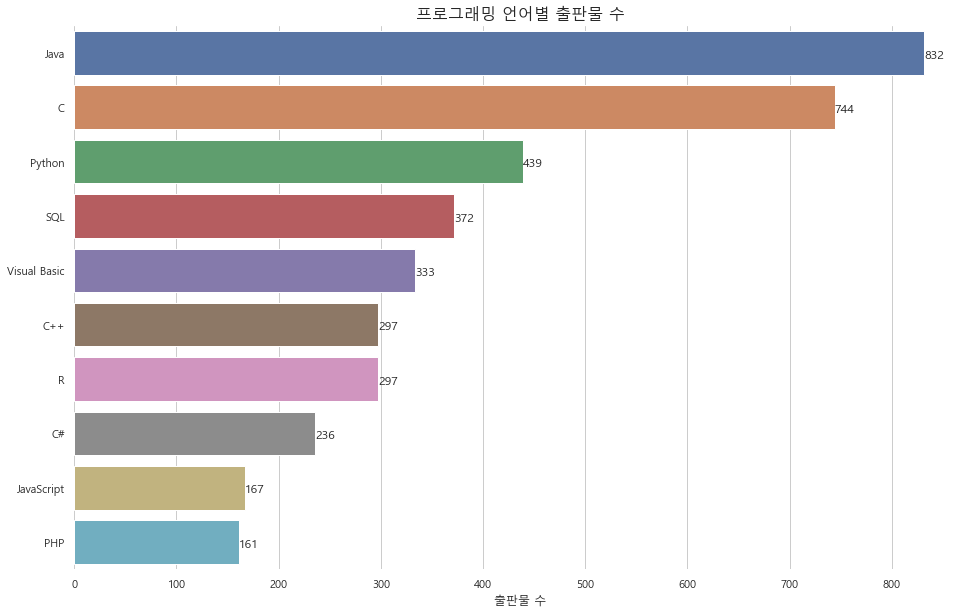

In [36]:
plt.figure(figsize=(16,10))
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style="white")
sns.set_color_codes("pastel")
plots = sns.barplot(data = by_language, x='title', y='language')
for bar in plots.patches:
    width = bar.get_width()
    plt.text(10+width, bar.get_y()+0.55*bar.get_height(), '{:.0f}'.format(width), ha='center', va='center', size=12)
plt.title('프로그래밍 언어별 출판물 수', fontsize=16)
plt.xlabel('출판물 수', fontsize=12)
plt.ylabel("")
plt.grid(axis='x')
sns.despine(left=True, bottom=True)
plt.show()

- Java에 관한 출판물이 가장 많은 것으로 보인다.

## 4. 출판사 순위 시각화

In [37]:
by_publisher = book_df.groupby(['publisher']).agg({
                                                'title':'count',
                                                'price':'mean'})

by_publisher = by_publisher.reset_index()
by_publisher = by_publisher.sort_values(['title'], ascending=False).reset_index(drop=True)
by_publisher

,publisher,title,price
0,한빛미디어,322,25730.745342
1,에이콘출판,206,34086.407767
2,정보문화사,199,25582.914573
3,영진닷컴,164,22093.292683
4,Packt(GCOScience),143,20975.524476
...,...,...,...
423,두남,1,13000.000000
424,동화기술교역,1,12000.000000
425,오메가북스,1,27000.000000
426,오미글로벌,1,3000.000000


In [38]:
# 427 출판사를 순위대로 나열하는 것은 무의미해 보이므로 탑10만 확인해 본다.
by_publisher_top10 = by_publisher[:10]

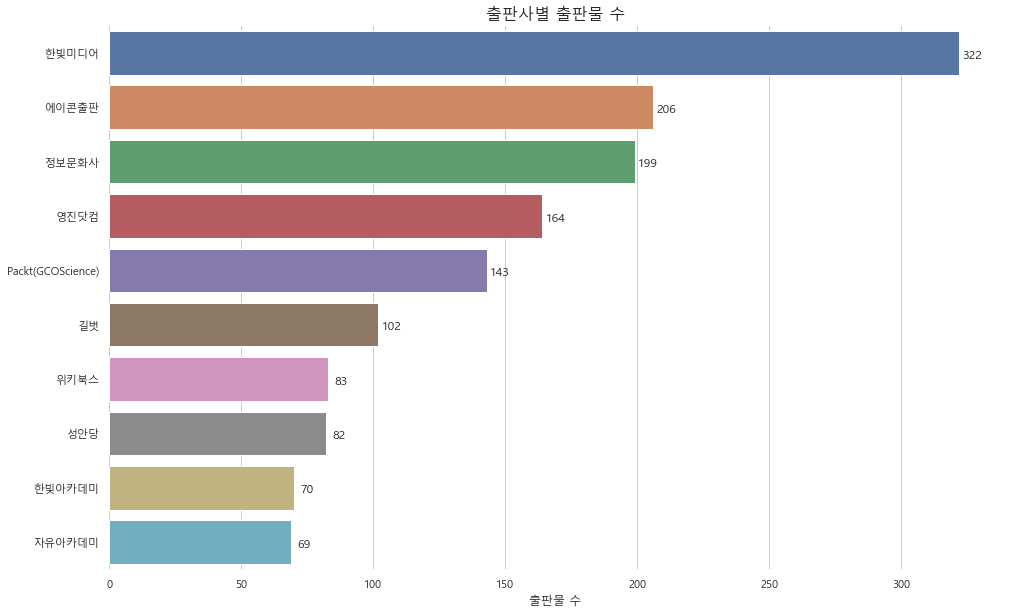

In [39]:
plt.figure(figsize=(16,10))
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style="white")
sns.set_color_codes("pastel")
plots = sns.barplot(data = by_publisher_top10, x='title', y='publisher')
for bar in plots.patches:
    width = bar.get_width()
    plt.text(5+width, bar.get_y()+0.55*bar.get_height(), '{:.0f}'.format(width), ha='center', va='center', size=12)
plt.title('출판사별 출판물 수', fontsize=16)
plt.xlabel('출판물 수', fontsize=12)
plt.ylabel("")
plt.grid(axis='x')
sns.despine(left=True, bottom=True)
plt.show()

- 한빛미디어에서 압도적으로 많은 수의 출판물을 냈다

## 5. 최근 2년 출판물과 그 전 3년의 출판물 비교

In [40]:
book_year = book_df[book_df['year'] > 2016]

In [41]:
book_year['category'] = np.where(book_year['year'] > 2019, "Recent", "Older")

C:\Users\hsada\AppData\Local\Temp/ipykernel_3940/1308727618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_year['category'] = np.where(book_year['year'] > 2019, "Recent", "Older")


In [48]:
book_year['category'].value_counts()

Older     706
Recent    533
Name: category, dtype: int64

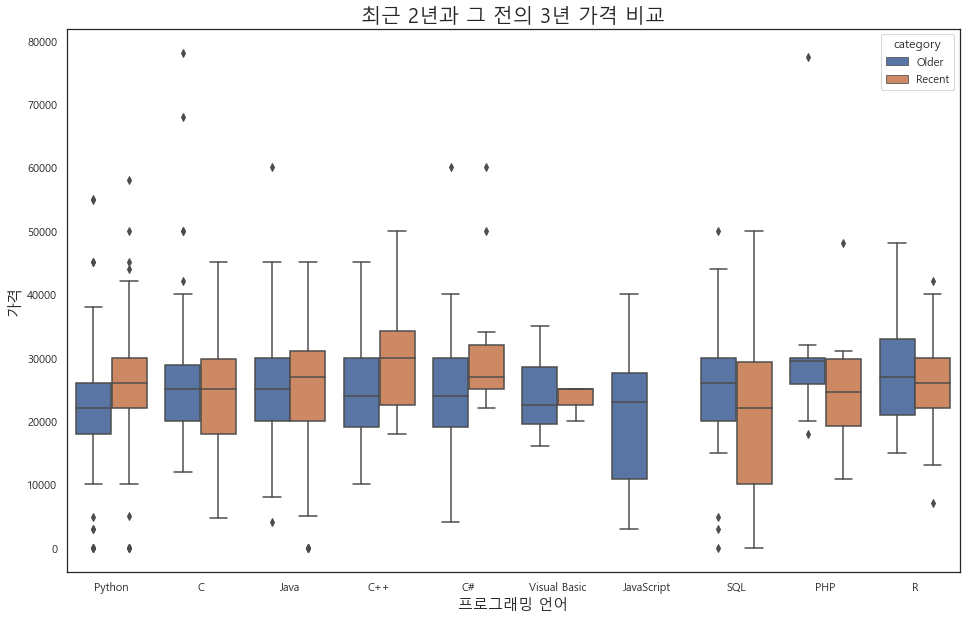

In [43]:
plt.figure(figsize=(16,10))
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style="white")
sns.set_color_codes("pastel")
sns.boxplot(x='language', y='price', hue = 'category', data=book_year)
plt.title("최근 2년과 그 전의 3년 가격 비교", fontsize=20)
plt.ylabel('가격', fontsize=15)
plt.xlabel('프로그래밍 언어', fontsize=15)
plt.show()

- 파이썬, C++의 경우 책의 평균 가격이 최근에 들어 높아졌다
- 가격의 제일 큰 분포는 SQL로 나타난다

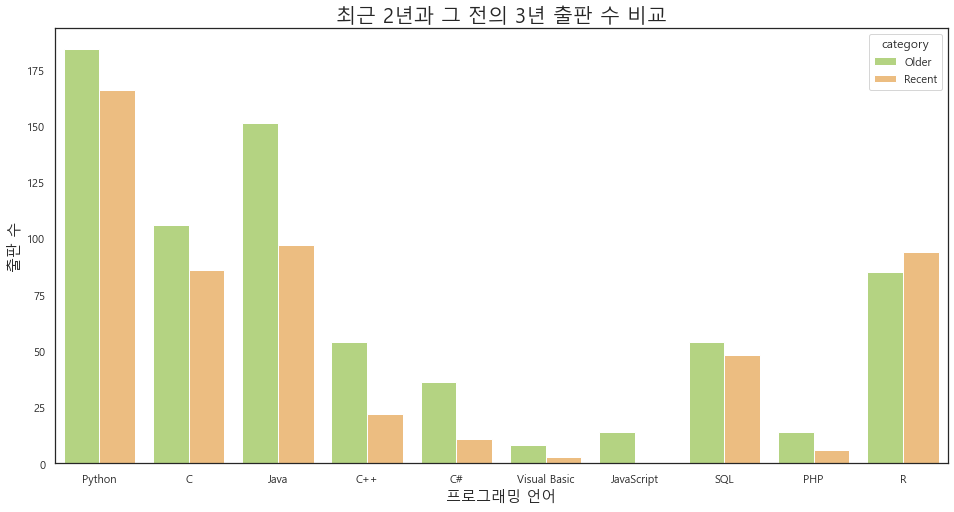

In [47]:
plt.subplots(figsize=(16,8))
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style="white")
sns.set_color_codes("pastel")
sns.countplot(x='language', data=book_year, hue='category', palette='RdYlGn_r')
plt.title("최근 2년과 그 전의 3년 출판 수 비교", fontsize=20)
plt.ylabel('출판 수', fontsize=15)
plt.xlabel('프로그래밍 언어', fontsize=15)
plt.show()

- 최근에 들어 대다수의 언어의 출판물 수가 줄어든 것으로 보인다.
- 하지만 이것은 데이터 크롤링 자체에서 오는 한계이지 않을까 라는 추측도 해볼 수 있다. 네이버 API 규제상 한 검색어당 1000건까지 검색이 되기에 상대적으로 최근 출판된 책들이 1000건을 넘어가서 긁어오지 못했을 수도 있다는 가정도 해볼 수 있다.
- 다만 시간 여유상... 1000건까지만 제한을 두고 데이터 분석을 해본다.

In [50]:
by_category = book_year.groupby(['category', 'language']).agg({
                                                'title':'count',
                                                'price':'mean'}).reset_index()

In [51]:
def label_point(x, y, val):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        plt.text(point['x']+150, point['y'], str(point['val']))

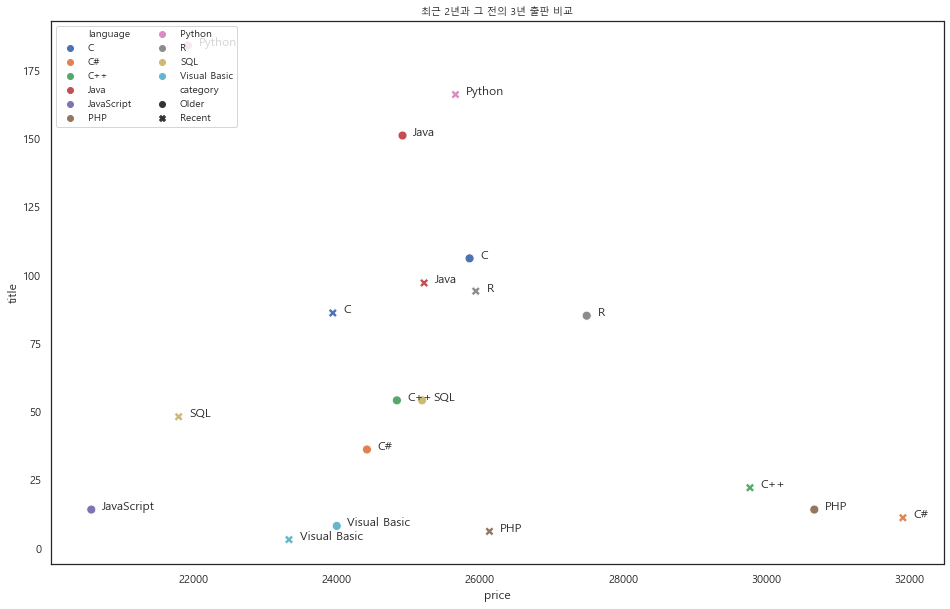

In [52]:
plt.figure(figsize=(16,10))

sns.scatterplot(x="price", y='title', hue='language', style="category", data=by_category, s=80)
plt.title("최근 2년과 그 전의 3년 출판 비교", fontsize=10)
plt.legend(loc="upper left", ncol=2, fontsize=10)

label_point(by_category.price, by_category.title, by_category.language)

plt.show()

## 6. 전체 보기

In [53]:
# 네이버 API 상세검색에서 연도를 지정해줄 범위와 키워드 설정
years_start = [19600101, 20050101, 20100101, 20160101, 20200101]
years_end = [20041231, 20091231, 20151231, 20191231, 20220426]

keywords_2 = ['Assembly language', 'Classic Visual Basic', 'Go 언어', 'MATLAB', 'Groovy', 'Groovy 언어', 'Ruby', 'Ruby 언어', 'Swift', 'Swift 언어', 'Fortran', 'Fortran 언어', 'Perl', 'Perl 언어', 'Delphi/Object Pascal']

In [54]:
book_part2_df = pd.DataFrame()

In [55]:
# 반복문을 돌려 각 검색어의 책 정보를 불러모아 book_df에 저장
for query in keywords_2:
    for i in range(5):
        start = years_start[i]
        end = years_end[i]
        for n in range(1, 1000, 100):
            url = get_url(query, n, 100, start, end)
            one_result = get_result_onpage(url)
            tmp_df = get_info(one_result, query)

        book_part2_df = pd.concat([book_part2_df, tmp_df], ignore_index=True)
        time.sleep(1)

[2022-04-27 14:03:13.576220] Url Request Success
[2022-04-27 14:03:13.637158] Url Request Success
[2022-04-27 14:03:13.709699] Url Request Success
[2022-04-27 14:03:13.763912] Url Request Success
[2022-04-27 14:03:13.817969] Url Request Success
[2022-04-27 14:03:13.884473] Url Request Success
[2022-04-27 14:03:13.943014] Url Request Success
[2022-04-27 14:03:14.006531] Url Request Success
[2022-04-27 14:03:14.071839] Url Request Success
[2022-04-27 14:03:14.191298] Url Request Success
[2022-04-27 14:03:15.252199] Url Request Success
[2022-04-27 14:03:15.317140] Url Request Success
[2022-04-27 14:03:15.394409] Url Request Success
[2022-04-27 14:03:15.457844] Url Request Success
[2022-04-27 14:03:15.516703] Url Request Success
[2022-04-27 14:03:15.581281] Url Request Success
[2022-04-27 14:03:15.634354] Url Request Success
[2022-04-27 14:03:15.698494] Url Request Success
[2022-04-27 14:03:15.758461] Url Request Success
[2022-04-27 14:03:15.812700] Url Request Success
[2022-04-27 14:03:16

In [57]:
# price null값 확인
book_part2_df.loc[book_df['price'] == '']

,title,author,price,publisher,isbn,pubdate,keyword,link


In [59]:
# isbn null값 확인
book_part2_df.loc[book_df['isbn'] == '']

,title,author,price,publisher,isbn,pubdate,keyword,link


In [58]:
book_part2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      388 non-null    object
 1   author     388 non-null    object
 2   price      388 non-null    object
 3   publisher  388 non-null    object
 4   isbn       388 non-null    object
 5   pubdate    388 non-null    object
 6   keyword    388 non-null    object
 7   link       388 non-null    object
dtypes: object(8)
memory usage: 24.4+ KB


In [60]:
# year 컬럼 추가
book_part2_df['year'] = ''
book_part2_df['year'] = book_df['pubdate'].str[:4].astype(int)

In [61]:
# price float형으로 변환
book_part2_df['price'] = book_part2_df['price'].astype(float)

In [65]:
# 중복 데이터 확인
duplicates = book_part2_df.duplicated(['isbn'])
duplicates.value_counts()

False    377
True      11
dtype: int64

In [66]:
# 중복 데이터 삭제
book_part2_df = book_part2_df.drop_duplicates(['isbn'], keep = 'first').reset_index(drop=True)

In [62]:
# language 컬럼 추가
book_part2_df['language'] = book_part2_df['keyword']

In [63]:
book_part2_df['keyword'].unique()

array(['Assembly language', 'Go 언어', 'MATLAB', 'Ruby', 'Ruby 언어', 'Swift',
       'Fortran', 'Fortran 언어', 'Perl', 'Perl 언어'], dtype=object)

In [67]:
# 각 키워드를 Language 컬럼에 언어 이름으로
for index, row in book_part2_df.iterrows():
    if "Go 언어" in row['keyword']:
        book_part2_df.loc[index, 'language'] = "Go"
    elif "Ruby 언어" in row['keyword']:
        book_part2_df.loc[index, 'language'] = "Ruby"
    elif "Fortran 언어" in row['keyword']:
        book_part2_df.loc[index, 'language'] = "Fortran"
    elif "Perl 언어" in row['keyword']:
        book_part2_df.loc[index, 'language'] = "Perl"

In [68]:
book_part2_df['language'].unique()

array(['Assembly language', 'Go', 'MATLAB', 'Ruby', 'Swift', 'Fortran',
       'Perl'], dtype=object)

In [70]:
book_part2_df['language'].value_counts()

MATLAB               184
Fortran              109
Swift                 29
Perl                  27
Go                    14
Ruby                  11
Assembly language      3
Name: language, dtype: int64

In [71]:
len(book_part2_df.index)

377

In [72]:
# 파트2 페이지 수 긁어오기

for i in range(377):
    url = book_part2_df['link'][i]
    response = urllib.request.urlopen(url)
    page = BeautifulSoup(response, 'html.parser')

    try:
        page_raw = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text

        if len(page_raw.split()) >= 2:
            page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text.split()[1].split('|')[0]
            
            # 원제가 있는 번역본은 4번째 div태그에서 페이지수를 가져와야한다
            if page_num.isalpha() == True:
                page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0] 
            
            if len(page_num) > 4:
                page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0] 
        else:
            page_num = ''

    except:
        page_num = ''

    book_part2_df.loc[i, 'page_num'] = page_num
    print(i, page_num, url)

0 448 http://book.naver.com/bookdb/book_detail.php?bid=206014
1 752 http://book.naver.com/bookdb/book_detail.php?bid=3658966
2 752 http://book.naver.com/bookdb/book_detail.php?bid=2133212
3 504 http://book.naver.com/bookdb/book_detail.php?bid=3556675
4 488 http://book.naver.com/bookdb/book_detail.php?bid=9102978
5 146 http://book.naver.com/bookdb/book_detail.php?bid=9923469
6 324 http://book.naver.com/bookdb/book_detail.php?bid=10337667
7 460 http://book.naver.com/bookdb/book_detail.php?bid=13786841
8 296 http://book.naver.com/bookdb/book_detail.php?bid=10680229
9 384 http://book.naver.com/bookdb/book_detail.php?bid=14468474
10 516 http://book.naver.com/bookdb/book_detail.php?bid=12308125
11 422 http://book.naver.com/bookdb/book_detail.php?bid=14050528
12 280 http://book.naver.com/bookdb/book_detail.php?bid=12308784
13 428 http://book.naver.com/bookdb/book_detail.php?bid=10406887
14 488 http://book.naver.com/bookdb/book_detail.php?bid=12845795
15 744 http://book.naver.com/bookdb/book_d

In [73]:
book_part2_df[book_part2_df['page_num'] == '']

,title,author,price,publisher,isbn,pubdate,keyword,link,year,language,page_num


In [75]:
try:
    book_part2_df['page_num'] = pd.to_numeric(book_part2_df['page_num']) 
except ValueError:
    # I want to register on my log the message recived on ORIGINAL VALUE
    mask = pd.to_numeric(book_part2_df['page_num'], errors='coerce').isna() 
    #if possible missing values
    #mask = pd.to_numeric(df['ORIGINAL_VALUE'].fillna('0'), errors='coerce').isna() 
    L = book_part2_df.loc[mask, 'page_num'].tolist()
    print ("Not converted values are: " + ", ".join(L))
    #Not converted values are: Wrong date format

    log.exception("Not converted values are: " + ", ".join(L))

Not converted values are: 15000원, 48000원


NameError: name 'log' is not defined

In [76]:
book_part2_df[book_part2_df['page_num'] == '15000원']

,title,author,price,publisher,isbn,pubdate,keyword,link,year,language,page_num
65,매트랩시작하기(MATLAB5),김우식,15000.0,인터비젼,8988066634,20000802,MATLAB,http://book.naver.com/bookdb/book_detail.php?b...,2019,MATLAB,15000원


In [77]:
book_part2_df.at[65, 'page_num'] = 262

In [78]:
book_part2_df[book_part2_df['page_num'] == '48000원']

,title,author,price,publisher,isbn,pubdate,keyword,link,year,language,page_num
371,MASTERING PERL 5,Herrmann,48000.0,에이콘출판,6000003710,19991009,Perl,http://book.naver.com/bookdb/book_detail.php?b...,2022,Perl,48000원


In [80]:
# 구글 서치 결과, 위와 같은 isbn으로 딱히 책이 뜨지 않기에 데이터를 삭제하기로 결정함.
book_part2_df = book_part2_df.drop([371], axis=0)

In [81]:
book_part2_df = book_part2_df.reset_index(drop=True)

In [83]:
book_part2_df['page_num'] = book_part2_df['page_num'].astype(float)

In [84]:
# 혹시 모르는 이상한 값도 찾아봄
book_part2_df[book_part2_df['page_num'] > 50000]

,title,author,price,publisher,isbn,pubdate,keyword,link,year,language,page_num
201,프로그래밍 루비 (Programming Ruby),Andy Hunt|Dave Thomas|Chad Fowler,39000.0,인사이트,8991268250,20070101,Ruby,http://book.naver.com/bookdb/book_detail.php?b...,2012,Ruby,9.788991e+12


In [85]:
# 절판되어 페이지 정보가 나오지 않으므로 삭제하기로 결정.
book_part2_df = book_part2_df.drop([201], axis=0).reset_index(drop=True)

In [86]:
# Part 1 데이터의 페이지 수도 조회하여 int로 변환
try:
    book_df['page_num'] = pd.to_numeric(book_df['page_num']) 
except ValueError:
    # I want to register on my log the message recived on ORIGINAL VALUE
    mask = pd.to_numeric(book_df['page_num'], errors='coerce').isna() 
    #if possible missing values
    #mask = pd.to_numeric(df['ORIGINAL_VALUE'].fillna('0'), errors='coerce').isna() 
    L = book_df.loc[mask, 'page_num'].tolist()
    print ("Not converted values are: " + ", ".join(L))
    #Not converted values are: Wrong date format

    log.exception("Not converted values are: " + ", ".join(L))

Not converted values are: C++, C#, 10日で, C＃, C++, C#, C++, C++, C#:, C++, C++, C#, C++, 33000원, (Web, 소장, 26600원, 48000원, C++, C++, C++, C++, C++, C++, C++, C++, C++, C++, C++, C#, C#, C#, C#, C#, GDI+, C#, .Net, C#, (A), C#, (A), C#, C＃, C＃, 소장, C#, C#, C#, C#, C#, 소장, 소장, 소장, 소장, 소장, 소장, 46000원, 9500원, 소장, 17000원, 30000원, 소장, 23000원


NameError: name 'log' is not defined

In [92]:
# 위의 결과는 페이지의 수 정보가 제공되지 않는 경우이므로, 제거시키기로 결정.
# nans = pd.to_numeric(book_df['page_num', errors = "coerce").isna()

book_df['page_num'] = book_df['page_num'].apply(pd.to_numeric, errors="coerce")

In [101]:
nan = book_df[book_df['page_num'].isnull()].index.tolist()

In [102]:
book_df = book_df.drop(nan, axis=0)

In [103]:
book_df[book_df['page_num'] > 50000]

,title,author,price,publisher,isbn,pubdate,keyword,link,year,language,page_num
1049,C++ 프로그래밍 언어,비야네 스트롭스트룹,50000.0,피어슨에듀케이션코리아,8945072098,20050420,C 언어,http://book.naver.com/bookdb/book_detail.php?b...,2005,C,9.788945e+12
1710,루씬 인 액션 (오픈소스 자바 검색엔진),오티스 고스포드네티치,30000.0,에이콘출판,8989975786,20051015,자바,http://book.naver.com/bookdb/book_detail.php?b...,2005,Java,8.989976e+09
2491,"WPF MVVM 일주일 만에 배우기 (XAML, C# , MVVM 패턴)",아르노 베유,13000.0,에이콘출판,1161750665,20171027,C#,http://book.naver.com/bookdb/book_detail.php?b...,2017,C#,9.791162e+12


In [104]:
# 위의 데이터 또한 지우기로 한다
book_df = book_df.drop([1049, 1710, 2491], axis=0)

In [105]:
# 데이터 합처주기
book_full = pd.concat([book_df, book_part2_df])

In [106]:
book_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4187 entries, 0 to 374
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      4187 non-null   object 
 1   author     4187 non-null   object 
 2   price      4187 non-null   float64
 3   publisher  4187 non-null   object 
 4   isbn       4187 non-null   object 
 5   pubdate    4187 non-null   object 
 6   keyword    4187 non-null   object 
 7   link       4187 non-null   object 
 8   year       4187 non-null   int32  
 9   language   4187 non-null   object 
 10  page_num   4187 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 376.2+ KB


In [118]:
# 확인해본 결과, ebook의 경우에는 페이지 수가 제공되지 않아, 크롤링 위치에 있던 가격이 긁어와 졌다. 그러므로 대략 5,000이 넘는 페이지 수는 제외를 하고 plot 해보기로 한다.
book_full[book_full['page_num'] > 5000]

,title,author,price,publisher,isbn,pubdate,keyword,link,year,language,page_num
153,블로그에 자동으로 글 업로드(feat. python),디큐,20000.0,부크크(Bookk),1137247223,20210607,Python,http://book.naver.com/bookdb/book_detail.php?b...,2021,Python,18000.0
158,"Python(파이썬)과 Matplotlib, NumPy, Pandas",양원영,10000.0,유페이퍼,1166784533,20210317,Python,http://book.naver.com/bookdb/book_detail.php?b...,2021,Python,9000.0
184,Python object(객체 분석 및 활용),강성모,15000.0,불잉걸,1196384215,20200210,Python,http://book.naver.com/bookdb/book_detail.php?b...,2020,Python,15000.0
893,시작해 C 언어라이브러리 (스터디북),박영진,5600.0,유페이퍼,1168930812,20220212,C,http://book.naver.com/bookdb/book_detail.php?b...,2022,C,5040.0
894,시작해 C 언어라이브러리 (워크북),박영진,5600.0,유페이퍼,1168930820,20220212,C,http://book.naver.com/bookdb/book_detail.php?b...,2022,C,5040.0
917,C#으로 이해하는 암호학,Alex Lee,18000.0,유페이퍼,1191319180,20201221,C,http://book.naver.com/bookdb/book_detail.php?b...,2020,C,18000.0
924,C#으로 이해하는 디자인 패턴,Alex Lee,15000.0,유페이퍼,1165224720,20200316,C,http://book.naver.com/bookdb/book_detail.php?b...,2020,C,15000.0
1161,C 언어 코딩과 알고리즘,이강재,15000.0,PCBOOK,8981931615,20190110,C 언어,http://book.naver.com/bookdb/book_detail.php?b...,2019,C,15000.0
1176,아이오교육센터 S/W 시리즈 - 고급 C 언어,김정인,12000.0,아이오출판사,1195716303,20160204,C 언어,http://book.naver.com/bookdb/book_detail.php?b...,2016,C,10800.0
1177,아두이노와 C 언어를 이용하여 CNC 만들기,한정남,10000.0,이페이지,8969336400,20160429,C 언어,http://book.naver.com/bookdb/book_detail.php?b...,2016,C,10000.0


In [121]:
book_below5000 = book_full.copy()
book_below5000 = book_below5000[book_below5000['page_num'] < 5000]

<Figure size 1440x720 with 0 Axes>

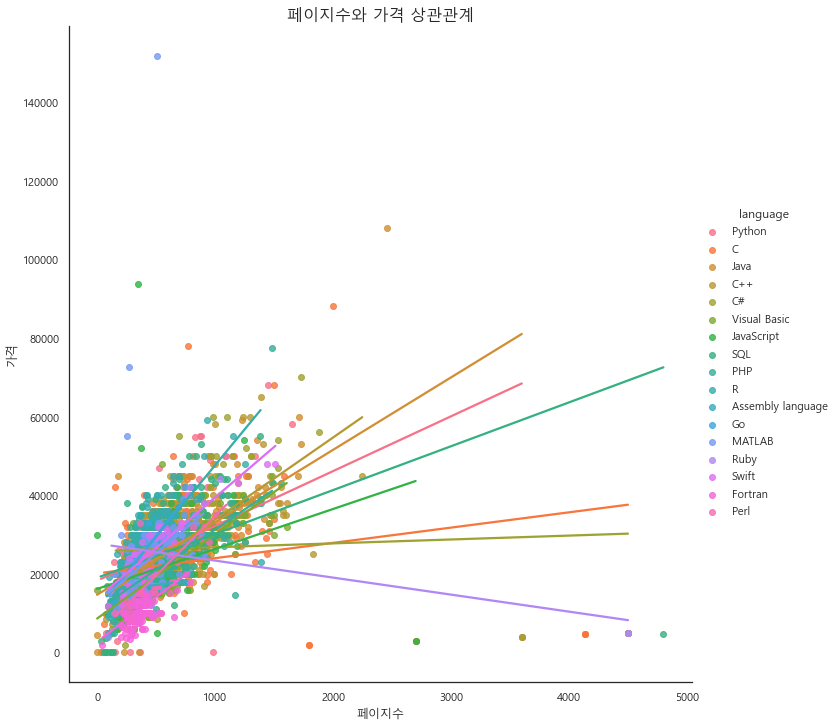

In [123]:
# lmplot: (page_num < 5000)

plt.figure(figsize=(20,10))
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style="white")
sns.set_color_codes("pastel")
sns.lmplot(data=book_below5000, x='page_num', y='price', hue='language', height=10, ci=None)

plt.title('페이지수와 가격 상관관계', fontsize=16)
plt.xlabel('페이지수', fontsize=12)
plt.ylabel("가격")
plt.show()

- 대체로 페이지 수의 증가에 따라서 가격도 증가하는 추세다.
- 예외로는 Ruby언어가 있어 보인다.
- 그리고, Python, Java, C++ 등의 언어가 비교적 높은 페이지수대비 가격 상승율을 보여주고 있다.

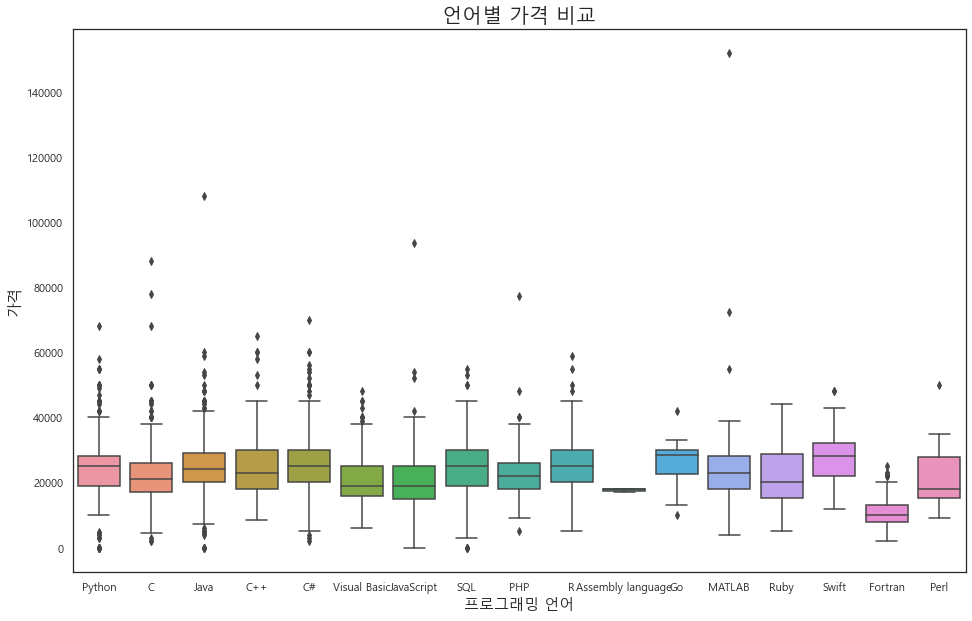

In [125]:
plt.figure(figsize=(16,10))
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style="white")
sns.set_color_codes("pastel")
sns.boxplot(x='language', y='price', data=book_below5000)
plt.title("언어별 가격 비교", fontsize=20)
plt.ylabel('가격', fontsize=15)
plt.xlabel('프로그래밍 언어', fontsize=15)
plt.show()

- 좀 더 대중적인 (Top10 + R)에 포함되어 있던 언어는 대체로 가격이 비슷하게 형성되어 있는 패턴을 볼 수 있다.
- 그에 비해 top11-20에 위치해 있던 언어는 조금 더 가격에 분포도 크고, top10의 평균과는 다르게 위치한 것을 볼 수 있다.

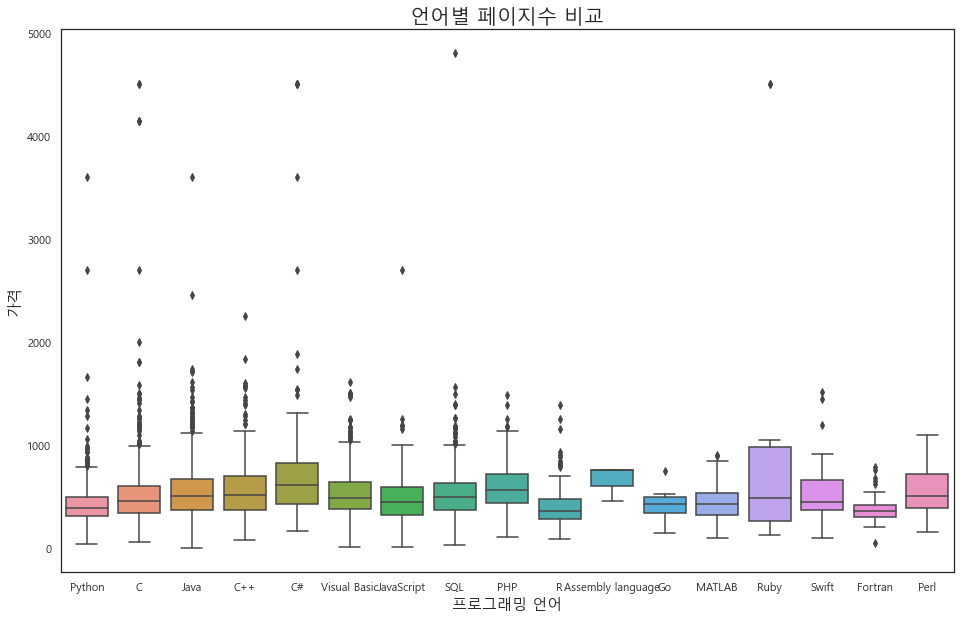

In [126]:
plt.figure(figsize=(16,10))
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style="white")
sns.set_color_codes("pastel")
sns.boxplot(x='language', y='page_num', data=book_below5000)
plt.title("언어별 페이지수 비교", fontsize=20)
plt.ylabel('가격', fontsize=15)
plt.xlabel('프로그래밍 언어', fontsize=15)
plt.show()

- 몇몇의 outlier가 있기는 하지만, Python의 경우 인기 언어 중에서 대체로 적은 페이지 수의 책이 많이 발행 되었다.
- C#의 경우 분포가 다른 인기 언어에 비해 커 보인다.
- 추측 해보자면 인기 언어일수록 조금 짧은 페이지 수의 책을 발행하여 진입 장벽을 낮추고, 가격은 그대로 받는... 그런 방식의 포지셔닝이 아닐까 생각한다.